In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 

In [3]:
cancer=load_breast_cancer()

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
features=pd.DataFrame(cancer.data,columns=cancer.feature_names)
target=pd.DataFrame(cancer.target,columns=['target'])

In [13]:
df = pd.concat([features,target],axis=1)

In [14]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [15]:
correlation=df.corr('pearson')

In [17]:
correlation['target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [18]:
X=df['worst concave points']
Y=df['target']

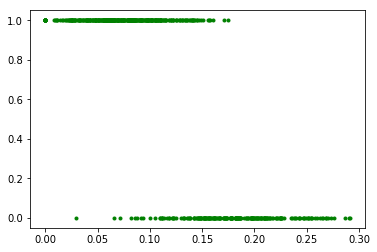

In [20]:
plt.plot(X,Y,"g.")

In [21]:
x=np.array(X)
y=np.array(Y)

In [22]:
x=((x-x.min())/(x.max()-x.min()))

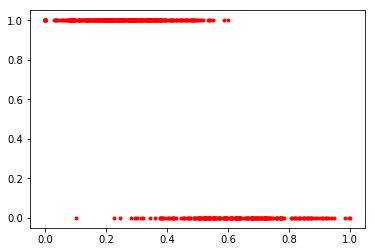

In [23]:
plt.plot(x,y,"r.")

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
def hypothesis(a,x,b):
    return (1/(1+np.exp(-(a*x+b))))

In [34]:
def error(a,x,b,y):
    e=0
    m=len(x)
    
    for i in range(m):
        e += -(y[i]*np.log(hypothesis(a,x[i],b))) - ((1-y[i])*np.log(1-hypothesis(a,x[i],b)))
        
    return (1/m)*e

In [35]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a=0
    grad_b=0
    
    m=len(x)
    
    for i in range(m):
        grad_a += (hypothesis(a,x[i],b)-y[i])*x[i]
        grad_b += (hypothesis(a,x[i],b)-y[i])
        
    a = a - (grad_a*learning_rate)
    b = b - (grad_b*learning_rate)
    
    return a,b

In [36]:
def descend(init_a,x,init_b,y,learning_rate,iterations):
    a = init_a
    b = init_b
    
    for i in range(iterations):
        e= error(a,x,b,y)
        
        if i%1000==0:
            print(f"error:{e}, a:{a}, b:{b}")
            
        a,b = step_gradient(a,x,b,y,learning_rate)
        
    return a,b

In [37]:
init_a=0
init_b=0
learning_rate=0.01
iterations=10000


In [38]:
final_a,final_b= descend(init_a,x_train,init_b,y_train,learning_rate,iterations)

error:0.6931471805599468, a:0, b:0
error:0.2203227213998827, a:-17.73335341018044, b:8.058016406885322
error:0.22026749771187948, a:-18.097721524774713, b:8.218293737112118
error:0.2202672878373913, a:-18.120350562072158, b:8.228250607383755
error:0.22026728698428347, a:-18.121793956354907, b:8.228885718215404
error:0.2202672869808015, a:-18.121886176374282, b:8.228926296178562
error:0.22026728698078735, a:-18.121892069035205, b:8.228928889023335
error:0.22026728698078704, a:-18.12189244556614, b:8.228929054701673
error:0.22026728698078696, a:-18.121892469625827, b:8.228929065288238
error:0.2202672869807872, a:-18.121892471163182, b:8.228929065964694


In [40]:
error(final_a,x_train,final_b,y_train)

0.22026728698078724

In [41]:
error(final_a,x_test,final_b,y_test)

0.2195698615341156

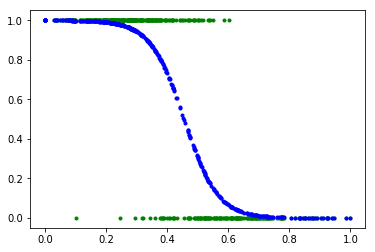

In [43]:
plt.plot(x_train,y_train,"g.",
         x_train,hypothesis(final_a,x_train,final_b),"b.")

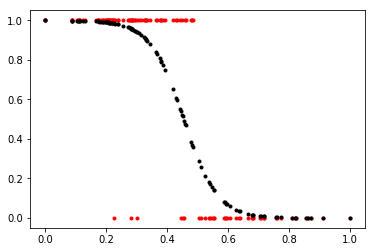

In [46]:
plt.plot(x_test,y_test,"r.",
         x_test,hypothesis(final_a,x_test,final_b),"k.")

In [47]:
def accuracy(a,x,b,y):
    correct=0
    m=len(x)
    
    for i in range(m):
        prediction=hypothesis(a,x[i],b)
        
        if prediction > 0.5:
            z=1
        else:
            z=0
        if y[i]==z:
            correct +=1
    print(f"Accuracy: {correct/len(y)}")

In [48]:
accuracy(final_a,x_train,final_b,y_train)

Accuracy: 0.9098901098901099


In [49]:
accuracy(final_a,x_test,final_b,y_test)

Accuracy: 0.9122807017543859
